# Targets whose value difference of the label between max and min is larger than threshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.965,0.857,0.899,0.894,0.936,0.892,0.084,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.966,0.859,0.900,0.895,0.937,0.893,0.054,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.980,0.965,0.852,0.901,0.896,0.928,0.887,26.445,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.964,0.856,0.899,0.895,0.928,0.887,26.413,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.980,0.961,0.852,0.900,0.895,0.933,0.890,0.391,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,model_5_seed_1_rec_5_ens_1,0.966,0.900,0.735,0.835,0.823,0.784,NaN,0.917,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36996,model_5_seed_1_rec_6_ens_1,0.965,0.902,0.737,0.835,0.824,0.784,NaN,1.534,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36997,model_5_seed_1_rec_7_ens_1,0.965,0.901,0.735,0.835,0.824,0.785,NaN,1.668,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36998,model_5_seed_1_rec_8_ens_1,0.965,0.897,0.732,0.835,0.823,0.785,NaN,1.460,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False


In [4]:
# Check target number changing threshold
label = 'GDT_TS'
thresholds = [0.05, 0.10, 0.15, 0.20]
for threshold in thresholds:
    data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
    print(threshold, data['Target'].unique().size)
    print(data['Target'].unique())

0.05 34
['5OJL_A' '6SIU_A' '6S36_A' '5OXS_A' '6OD8_A' '6ZVO_A' '5ZWL_E' '6JW0_A'
 '6U60_A' '6JDH_A' '6SJ5_A' '6FHV_A' '7OCX_C' '5YLW_A' '6D1V_A' '6E2J_B'
 '6E7R_B' '6KV9_A' '7BU0_A' '6QP4_A' '6WWD_A' '6QPS_A' '6G1O_A' '6WWX_A'
 '6KK9_O' '6D2Y_A' '6PX4_T' '6I9O_A' '6QDI_A' '6FPZ_A' '6OV1_A' '7NZA_A'
 '6XR1_A' '6R5W_A']
0.1 17
['5OXS_A' '6ZVO_A' '5ZWL_E' '6JW0_A' '6FHV_A' '7OCX_C' '6D1V_A' '6E2J_B'
 '7BU0_A' '6QP4_A' '6WWD_A' '6WWX_A' '6KK9_O' '6D2Y_A' '6QDI_A' '6XR1_A'
 '6R5W_A']
0.15 9
['5ZWL_E' '6JW0_A' '6FHV_A' '7OCX_C' '6WWX_A' '6D2Y_A' '6QDI_A' '6XR1_A'
 '6R5W_A']
0.2 5
['5ZWL_E' '6JW0_A' '6WWX_A' '6QDI_A' '6R5W_A']


In [5]:
label = 'GDT_TS'
threshold = 0.05
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
print(threshold, fil_df['Target'].unique().size)
print(fil_df['Target'].unique())

0.05 34
['5OJL_A' '6SIU_A' '6S36_A' '5OXS_A' '6OD8_A' '6ZVO_A' '5ZWL_E' '6JW0_A'
 '6U60_A' '6JDH_A' '6SJ5_A' '6FHV_A' '7OCX_C' '5YLW_A' '6D1V_A' '6E2J_B'
 '6E7R_B' '6KV9_A' '7BU0_A' '6QP4_A' '6WWD_A' '6QPS_A' '6G1O_A' '6WWX_A'
 '6KK9_O' '6D2Y_A' '6PX4_T' '6I9O_A' '6QDI_A' '6FPZ_A' '6OV1_A' '7NZA_A'
 '6XR1_A' '6R5W_A']


In [6]:
diff_label = fil_df.groupby('Target').apply(lambda x: x[label].max() - x[label].min()).sort_values()
diff_label

Target
6KV9_A   0.050
6E7R_B   0.051
6QPS_A   0.051
6OV1_A   0.057
6S36_A   0.058
6FPZ_A   0.061
6SJ5_A   0.062
6G1O_A   0.065
6PX4_T   0.076
6I9O_A   0.076
6OD8_A   0.077
7NZA_A   0.078
6JDH_A   0.080
6SIU_A   0.083
5YLW_A   0.089
6U60_A   0.096
5OJL_A   0.100
6ZVO_A   0.100
6D1V_A   0.101
6WWD_A   0.115
6E2J_B   0.115
6KK9_O   0.118
5OXS_A   0.120
7BU0_A   0.135
6QP4_A   0.148
6D2Y_A   0.156
7OCX_C   0.159
6XR1_A   0.161
6FHV_A   0.177
5ZWL_E   0.203
6R5W_A   0.209
6WWX_A   0.260
6JW0_A   0.355
6QDI_A   0.503
dtype: float64

<AxesSubplot:ylabel='Target'>

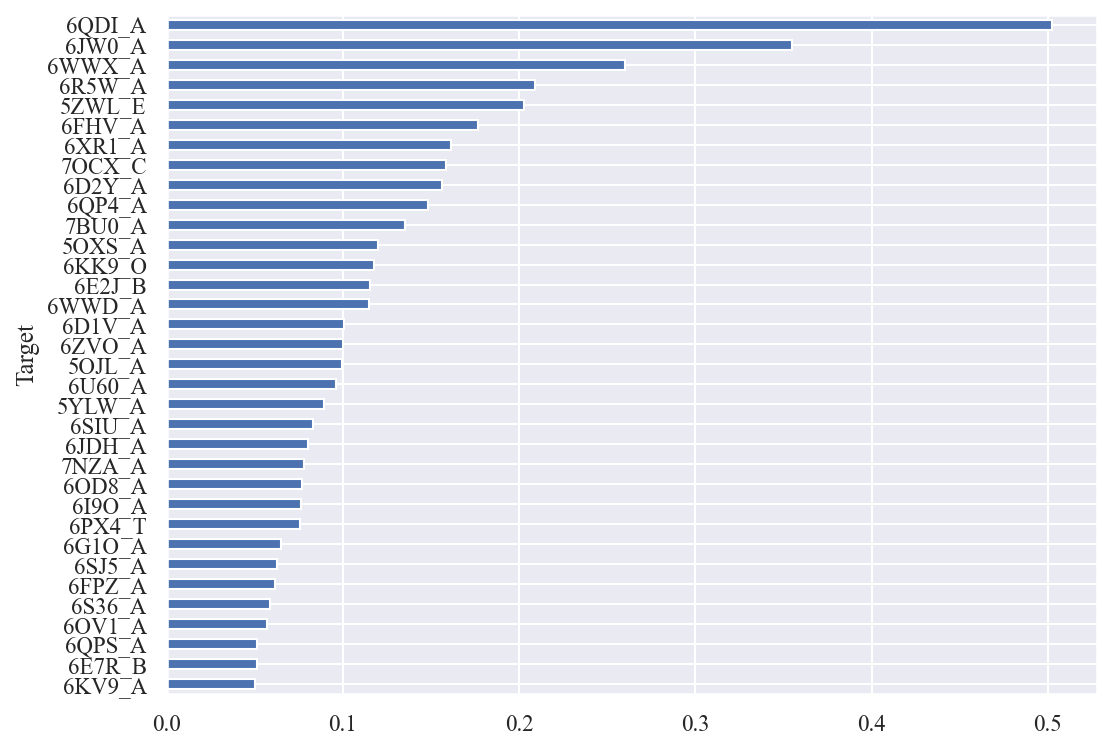

In [7]:
diff_label.plot(kind='barh', figsize=(8, 6))

In [8]:
import matplotlib.cm as cm
def boxplot_labels(df, labels, y='Target', figsize=(10, 8)):
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), sharex=False, sharey=True, figsize=figsize)
    for i, label in enumerate(labels):
        sns.boxplot(data=df, y=y, x=label, ax=axes[i], color=cm.Set2(i / len(labels)))
    for i in range(1, len(axes)):
        axes[i].set_ylabel('')
    plt.tight_layout()

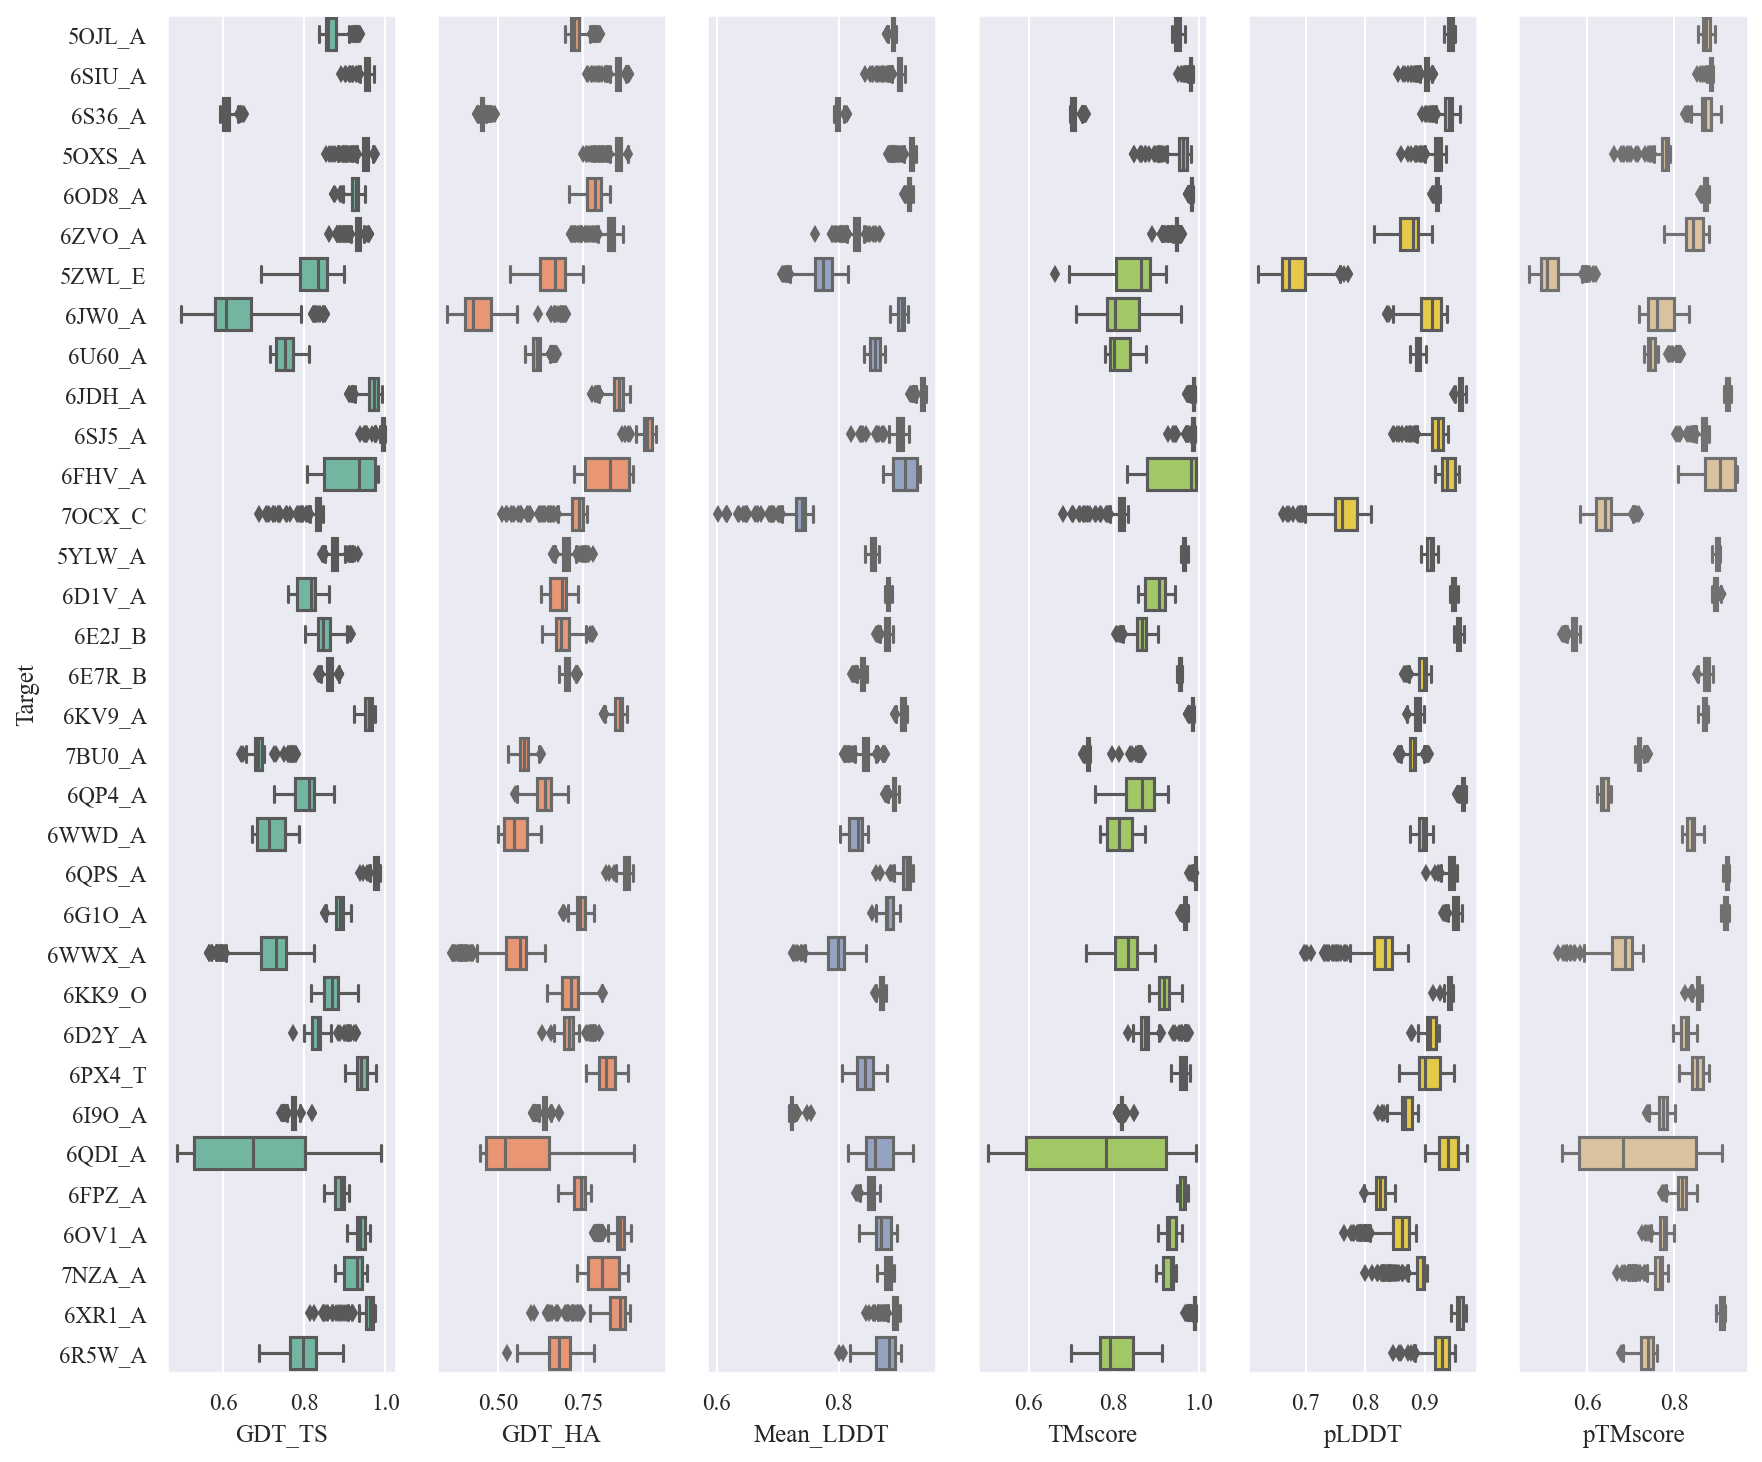

In [9]:
labels = ['GDT_TS', 'GDT_HA', 'Mean_LDDT', 'TMscore', 'pLDDT', 'pTMscore']
boxplot_labels(fil_df, labels, figsize=(12, 10))

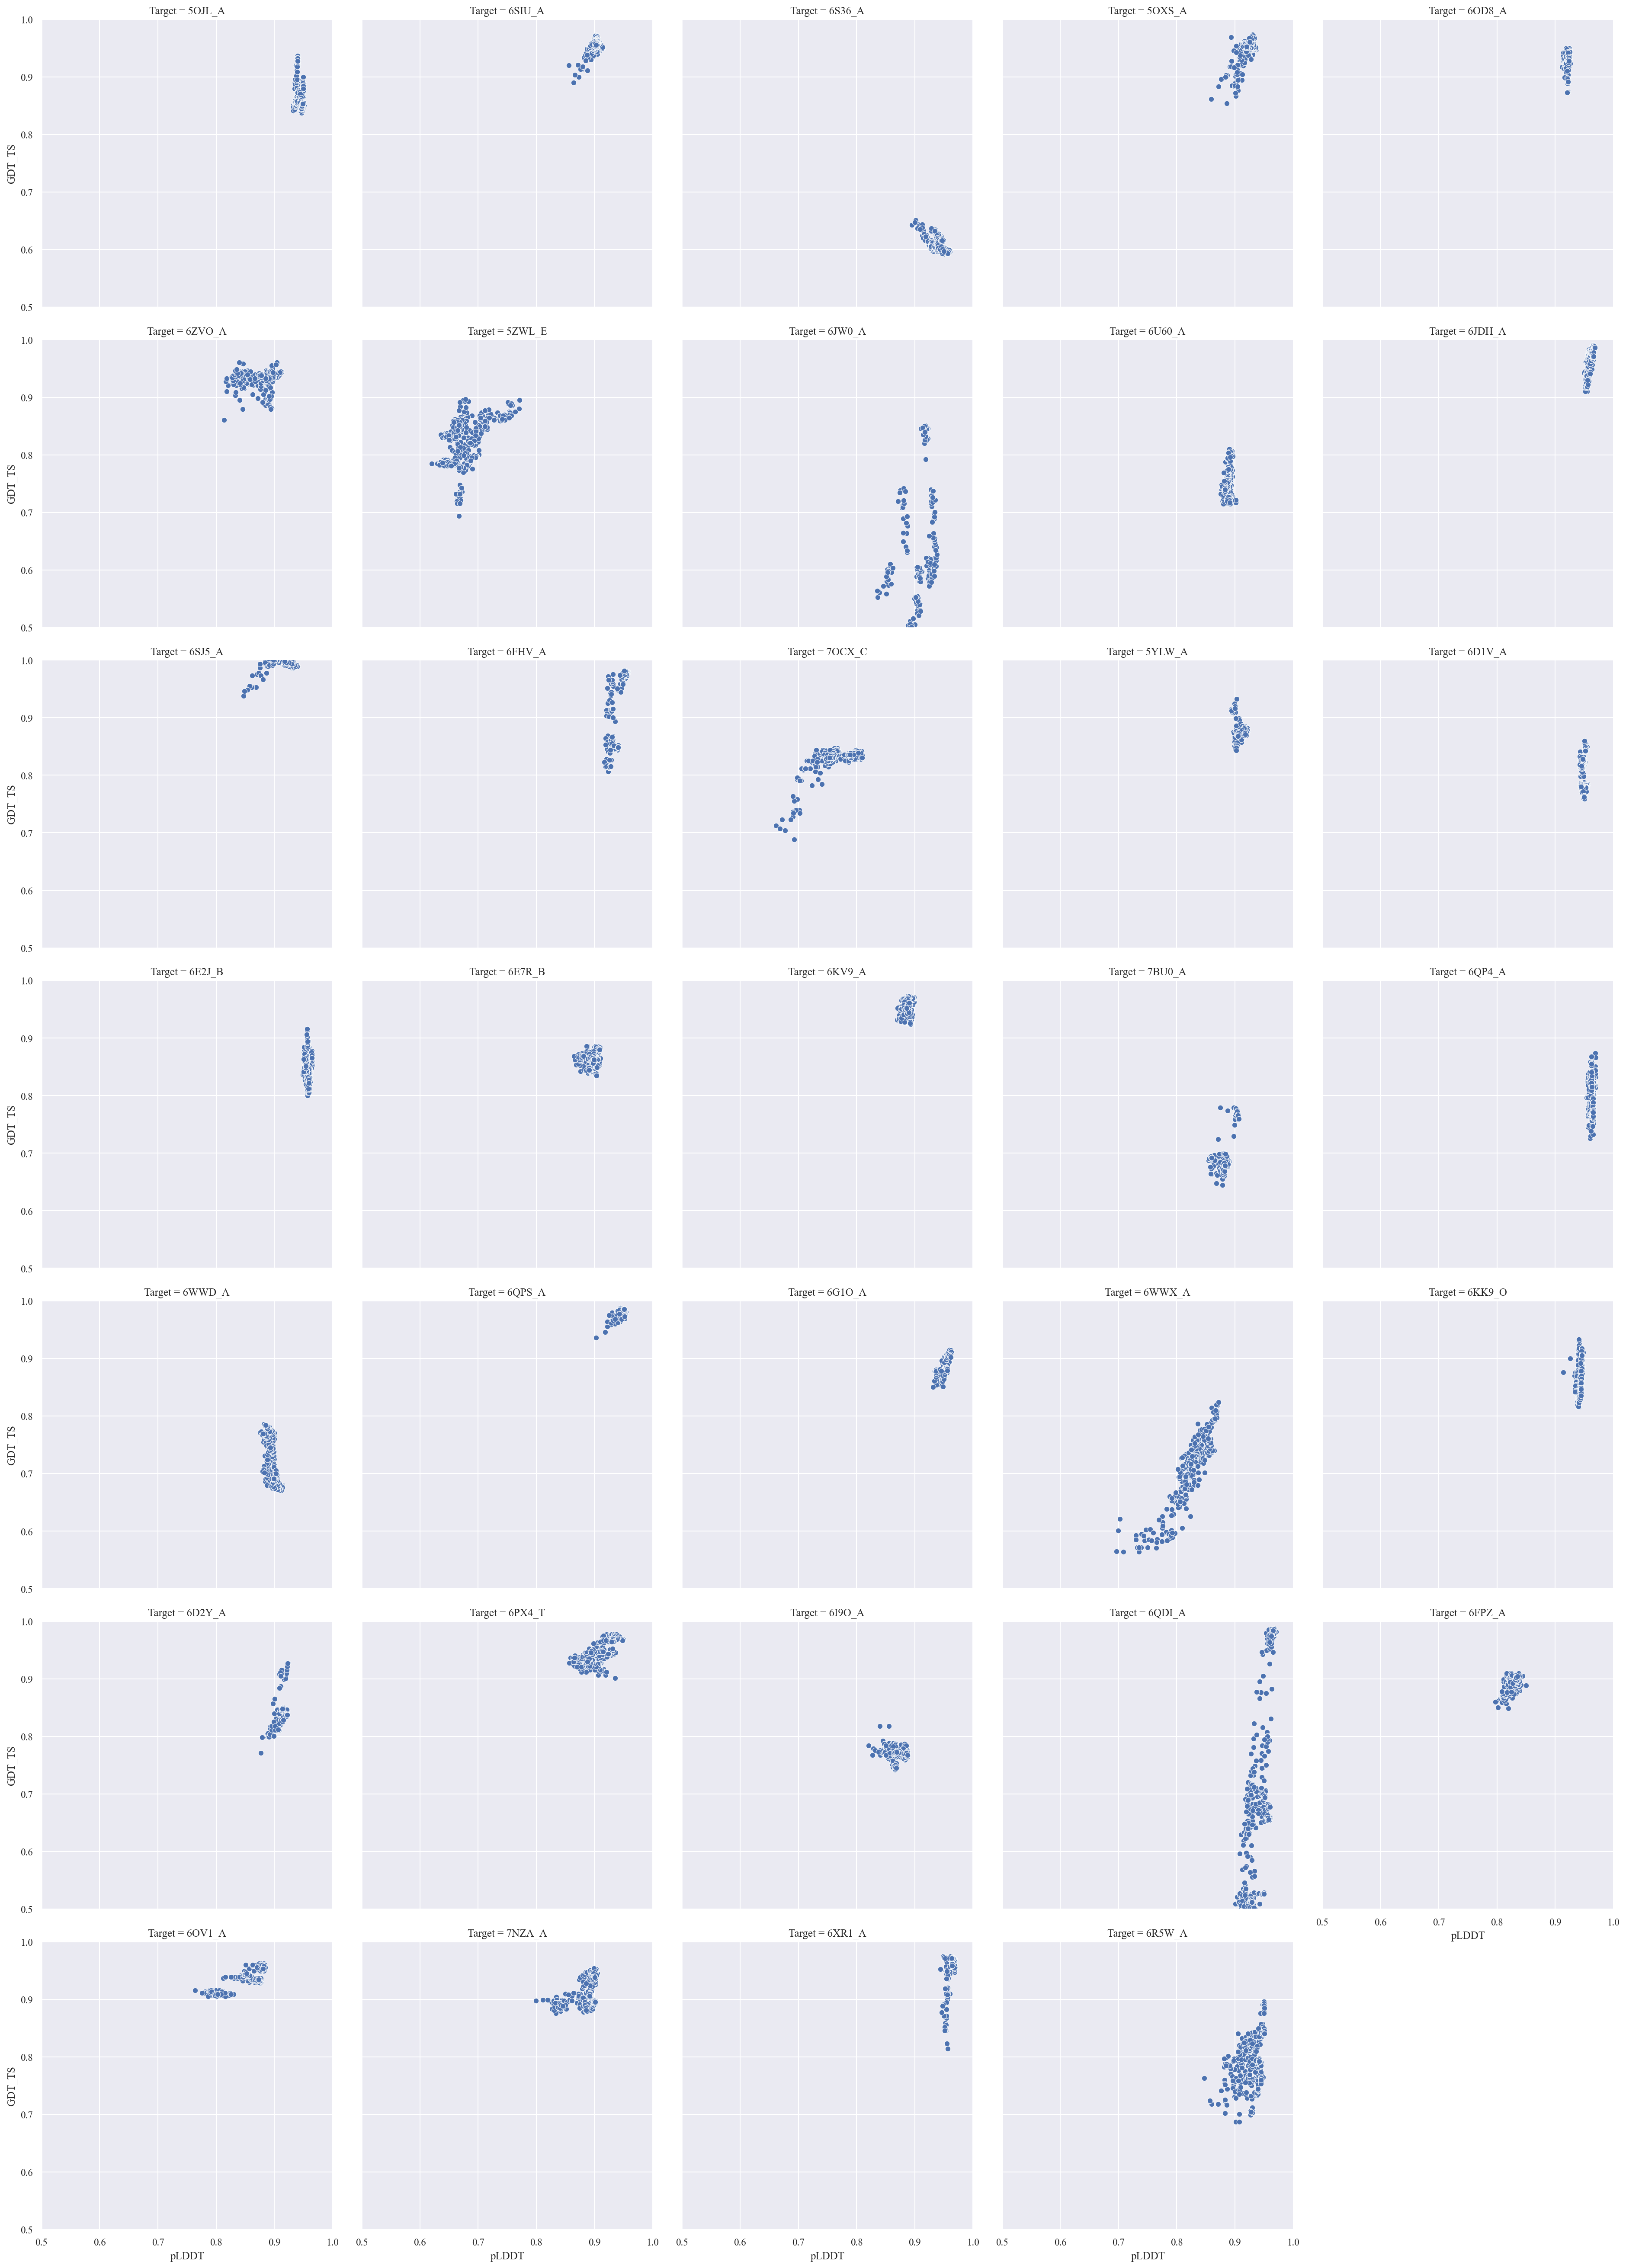

In [10]:
def scatter(df, x, y, col_wrap=4, lim=(0.7, 1)):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='Target', col_wrap=col_wrap)
    g.set(xlim=lim, ylim=lim)
    plt.subplots_adjust(wspace=0.1)
label = 'GDT_TS'
score = 'pLDDT'
scatter(fil_df, x=score, y=label, lim=(0.5, 1.0), col_wrap=5)